# 1. lectura del archivo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import redis

ModuleNotFoundError: No module named 'redis'

In [163]:
df_asig=pd.read_csv("asignaturas.csv",sep=',',encoding='utf-8')

# 2. Exploracion del data

In [164]:
#informacion de los datos
df_asig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 15 columns):
 #   Column                                                                                                                                        Non-Null Count  Dtype 
---  ------                                                                                                                                        --------------  ----- 
 0   Marca temporal                                                                                                                                98 non-null     object
 1   Escriba Apellidos.                                                                                                                            98 non-null     object
 2   Escriba Nombres.                                                                                                                              98 non-null     object
 3   Seleccione el Programa                    

renombramiento de columnas mas cortas y entendibles

In [165]:
df_asig.rename(columns = {df_asig.columns[1]:'apellidos',
                         df_asig.columns[2]:'nombres',
                         df_asig.columns[3]:'programa',
                         df_asig.columns[4]:'asignatura',
                         df_asig.columns[5]:'nota',
                         df_asig.columns[6]:'peso',
                         df_asig.columns[7]:'estatura',
                        df_asig.columns[8]:'edad',
                          df_asig.columns[9]:'fecha_nacimiento',
                          df_asig.columns[10]:'ciudad',
                          df_asig.columns[11]:'vive_con',
                          df_asig.columns[12]:'#act_fisica_semanal',
                          df_asig.columns[13]:'horas_sueño',
                          df_asig.columns[14]:'actividades_extra' 
                         },inplace=True)

In [166]:
df_asig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Marca temporal       98 non-null     object
 1   apellidos            98 non-null     object
 2   nombres              98 non-null     object
 3   programa             98 non-null     object
 4   asignatura           98 non-null     object
 5   nota                 95 non-null     object
 6   peso                 98 non-null     object
 7   estatura             98 non-null     object
 8   edad                 98 non-null     object
 9   fecha_nacimiento     97 non-null     object
 10  ciudad               98 non-null     object
 11  vive_con             98 non-null     object
 12  #act_fisica_semanal  98 non-null     object
 13  horas_sueño          97 non-null     object
 14  actividades_extra    97 non-null     object
dtypes: object(15)
memory usage: 11.6+ KB


## 2.1 Limpieza de los datos:

In [167]:
#eliminar filas que contengan valores nulos
df_asig=df_asig.dropna()
df_asig.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 0 to 97
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Marca temporal       93 non-null     object
 1   apellidos            93 non-null     object
 2   nombres              93 non-null     object
 3   programa             93 non-null     object
 4   asignatura           93 non-null     object
 5   nota                 93 non-null     object
 6   peso                 93 non-null     object
 7   estatura             93 non-null     object
 8   edad                 93 non-null     object
 9   fecha_nacimiento     93 non-null     object
 10  ciudad               93 non-null     object
 11  vive_con             93 non-null     object
 12  #act_fisica_semanal  93 non-null     object
 13  horas_sueño          93 non-null     object
 14  actividades_extra    93 non-null     object
dtypes: object(15)
memory usage: 11.6+ KB


## 2.2 Clasificacion de variablrs

### programa

In [168]:
df_asig.programa.unique()

array(['Ingeniería Electrónica', 'Ingeniería de Sistemas'], dtype=object)

In [169]:
#renombro variables de programa
df_asig.loc[df_asig.programa=='Ingeniería Electrónica','programa']='Ing Electronica'
df_asig.loc[df_asig.programa=='Ingeniería de Sistemas','programa']='Ing Sistemas'
df_asig.programa.unique()

array(['Ing Electronica', 'Ing Sistemas'], dtype=object)

### asignaturas

In [170]:
#arreglo de las asignaturas
df_asig.asignatura.unique()

array(['Algoritmos y programacion.', 'Programaci€�n II',
       'Algoritmos y programaci€�n', 'algoritmos y programaci€�n',
       'Algoritmos y Programaci€�n', 'algoritmos y programacion',
       'Algoritmos y Programacion', 'Bases de Datos II',
       'Bases de datos ll', 'Bases de datos dos', 'Bases de datos 2',
       'Bases de datos II', 'Base de datos II',
       'Algoritmos y programaci€�n I', 'Bases de datos II-Grupo-2',
       'Bases 2 Grupo 2', 'Bases de datos II Grupo 2', 'Base de datos 2',
       'Bases de datos', 'Teoria general de sistemas', 'TGS',
       'Teor€Ða general de Sistemas', 'ninguna',
       'Teoria General de Sistemas', 'Teor€Ða general de sistemas',
       'Teor€Ða General de los sistemas', 'Programaci€�n ll',
       'Programaci€�n 2', 'Programacion 2', 'Programacion II', 'Ninguna',
       'No veo materias con Quevedo', 'Programaci€�n 3',
       'Programaci€�n 1', 'Programaci€�n I', 'Programacion 1',
       'programacion I', 'Programacion I', 'Programacion 3

Existen muchos nombres para la misma asignatura, se les asigna el mismo nombre para las asignaturas en comun.

In [171]:
#asignacion nombre de algoritmos y programacion I para las asignaturas comunes
df_asig.loc[df_asig['asignatura'].str.contains(
    "n 1|n I$|cion$|€�n$|on.$",case=False),
            'asignatura']='algoritmos y programacion I'

In [172]:
#asignatura algoritmos y programacion II
df_asig.loc[df_asig['asignatura'].str.contains(
    "n 2|n II$|n ll$",case=False),
    'asignatura']='algoritmos y programacion II'

In [173]:
#asignatura algoritmos y programacion III
df_asig.loc[df_asig['asignatura'].str.contains(
    "n 3|n III|n lll",case=False),
    'asignatura']='algoritmos y programacion III'

In [174]:
# asigantura base de datos I
df_asig.loc[df_asig['asignatura'].str.contains(
    "datos$|datos I$|datos 1$",case=False),
    'asignatura']='base de datos I'

In [175]:
#asignatura base de datos II
df_asig.loc[df_asig['asignatura'].str.contains(
    "datos II|datos 2|datos dos|datos ll|bases 2",case=False),
    'asignatura']='base de datos II'

In [176]:
#asignatura teoria general de sistemas
df_asig.loc[df_asig['asignatura'].str.contains(
    'sistemas|TGS',case=False),'asignatura']='teoria general de sistemas'

In [177]:
#ninguna asignatura
#eliminar las que no tienen asignatura
df_asig = df_asig.drop(df_asig[df_asig['asignatura'].str.contains(
    'ninguna|no',case=False)].index)

In [178]:
df_asig['asignatura'].value_counts()

algoritmos y programacion I      29
algoritmos y programacion II     24
base de datos II                 20
teoria general de sistemas       11
algoritmos y programacion III     5
base de datos I                   1
Name: asignatura, dtype: int64

### notas primer 50 con Quevedo

In [179]:
np.array(df_asig['nota'])

array(['30', '31', '3.6', '3.3', '3.8', '3.7', '4.0', '39', '3.5', '22',
       '34', '2.1', '3.5', '4.5', '2.8', '38', '3.7', '3.4', '4.0', '3.0',
       '2.5', '3.5', '4.5', '3.5', '4.3', '4.2', '3', '4.3', '4.5', '3.7',
       '3.7', '2.5', '3.9', '3.4', '3.7', '5.0', '3.1', '3.1', '3.8',
       '31', '3.3', '3.2', '32', '4.8', '4.8', '47', '4.5', '4.7', '4.8',
       '4.8', '4.4', '4,5', '2.0', '35', '2.1', '3.7', '3.7', '2.3',
       '2.7', '1.8', '3.5', '3.7', '29', '2.3', '4.1', '4.4', '48', '4.5',
       '3.8', '4.3', '2.7', '2.9', '3.1', '2.4', '4.0', '4.4', '5.0',
       '2.3', '3.0', '3.5', '2.9', '3.0', '3.6', '3.1', '3.7', '4.2',
       '4.1', '3.1', '2.9', '3.8'], dtype=object)

In [180]:
#algunos numeros pueden contener ',' se reemplaza por '.' 
df_asig['nota']=df_asig['nota'].replace(',','.',regex=True)

#las notas estan en tipo objeto, se convierte a float
df_asig['nota']=pd.to_numeric(df_asig['nota'])

#varias notas no estan a la misma escala, se maneja para todas el rango de 0.0 a 5.0

In [181]:
#varias notas no estan a la misma escala, se dimensiona para que el rango este entre 0.0 a 5.0
df_asig.loc[df_asig['nota']>5.0,'nota']=df_asig['nota']/10
np.array(df_asig['nota'])

array([3. , 3.1, 3.6, 3.3, 3.8, 3.7, 4. , 3.9, 3.5, 2.2, 3.4, 2.1, 3.5,
       4.5, 2.8, 3.8, 3.7, 3.4, 4. , 3. , 2.5, 3.5, 4.5, 3.5, 4.3, 4.2,
       3. , 4.3, 4.5, 3.7, 3.7, 2.5, 3.9, 3.4, 3.7, 5. , 3.1, 3.1, 3.8,
       3.1, 3.3, 3.2, 3.2, 4.8, 4.8, 4.7, 4.5, 4.7, 4.8, 4.8, 4.4, 4.5,
       2. , 3.5, 2.1, 3.7, 3.7, 2.3, 2.7, 1.8, 3.5, 3.7, 2.9, 2.3, 4.1,
       4.4, 4.8, 4.5, 3.8, 4.3, 2.7, 2.9, 3.1, 2.4, 4. , 4.4, 5. , 2.3,
       3. , 3.5, 2.9, 3. , 3.6, 3.1, 3.7, 4.2, 4.1, 3.1, 2.9, 3.8])

### lugares

In [182]:
df_asig['ciudad'].unique()

array(['Tunja', 'tunja', 'Samac€ð', 'Barbosa Santander', 'Ventaquemada',
       'Tunja Boyac€ð', 'TUNJA', 'Paipa', 'Cucuta NDS'], dtype=object)

In [183]:
df_asig.loc[df_asig['ciudad'].str.contains(
    "tunja|barbosa|cucuta",case=False),
            'ciudad']='Tunja'

In [184]:
df_asig['ciudad'].unique()

array(['Tunja', 'Samac€ð', 'Ventaquemada', 'Paipa'], dtype=object)

### peso

In [185]:
np.array(df_asig['peso'])

array(['58', '58', '80', '80', '81', '81', '73', '73', '58', '58', '70.0',
       '70.0', '110', '110', '54', '54', '60 Kg', '60 Kg', '58', '54',
       '63', '69', '63', '80', '56', '60', '63', '57', '72', '59', '69.5',
       '72', '72.2', '64', '65', '72', '82.5', '61.3', '63.5', '58', '61',
       '60', '55', '60', '65.6', '60', '65', '60', '76', '62', '90', '53',
       '65', '76', '54', '78.0', '90', '60', '55', '55', '55.4', '55',
       '60', '64.5', '54', '60', '85', '85', '55', '55.5', '105', '47.4',
       '56', '72', '60', '69', '58', '57', '72', '63.2', '70', '85', '62',
       '70', '60', '59.8', '63', '50', '85', '79.6'], dtype=object)

In [186]:
#se cambia los kg por .0 para mantener solamente los valores numericos
df_asig['peso']=df_asig['peso'].replace("Kg",'',regex=True)
np.array(df_asig['peso'])

array(['58', '58', '80', '80', '81', '81', '73', '73', '58', '58', '70.0',
       '70.0', '110', '110', '54', '54', '60 ', '60 ', '58', '54', '63',
       '69', '63', '80', '56', '60', '63', '57', '72', '59', '69.5', '72',
       '72.2', '64', '65', '72', '82.5', '61.3', '63.5', '58', '61', '60',
       '55', '60', '65.6', '60', '65', '60', '76', '62', '90', '53', '65',
       '76', '54', '78.0', '90', '60', '55', '55', '55.4', '55', '60',
       '64.5', '54', '60', '85', '85', '55', '55.5', '105', '47.4', '56',
       '72', '60', '69', '58', '57', '72', '63.2', '70', '85', '62', '70',
       '60', '59.8', '63', '50', '85', '79.6'], dtype=object)

In [187]:
#conversio del objeto peso a numerico
df_asig['peso']=pd.to_numeric(df_asig['peso'])
np.array(df_asig['peso'])

array([ 58. ,  58. ,  80. ,  80. ,  81. ,  81. ,  73. ,  73. ,  58. ,
        58. ,  70. ,  70. , 110. , 110. ,  54. ,  54. ,  60. ,  60. ,
        58. ,  54. ,  63. ,  69. ,  63. ,  80. ,  56. ,  60. ,  63. ,
        57. ,  72. ,  59. ,  69.5,  72. ,  72.2,  64. ,  65. ,  72. ,
        82.5,  61.3,  63.5,  58. ,  61. ,  60. ,  55. ,  60. ,  65.6,
        60. ,  65. ,  60. ,  76. ,  62. ,  90. ,  53. ,  65. ,  76. ,
        54. ,  78. ,  90. ,  60. ,  55. ,  55. ,  55.4,  55. ,  60. ,
        64.5,  54. ,  60. ,  85. ,  85. ,  55. ,  55.5, 105. ,  47.4,
        56. ,  72. ,  60. ,  69. ,  58. ,  57. ,  72. ,  63.2,  70. ,
        85. ,  62. ,  70. ,  60. ,  59.8,  63. ,  50. ,  85. ,  79.6])

In [188]:
df_asig.peso.dtype

dtype('float64')

### Estatura

In [189]:
np.array(df_asig['estatura'])

array(['1.69', '1.69', '1.80', '1.80', '1.86', '1.86', '1.81', '1.81',
       '1.76', '1.76', '1.80', '1.80', '1.77', '1.77', '1.60', '1.60',
       '1.73', '1.73', '1.58', '1.56', '1.76', '1.83', '1.78', '1.87',
       '1.77 metros', '1.67', '1.7', '1.68', '1.80', '1.71', '1.71',
       '1.65 metros', '1.82', '1.74', '1.73', '1.80', '1.85', '1.83',
       '1.65', '193', '1.75', '1.77', '1.60', '1.60', '1.58', '172',
       '1.70', '1.70', '1.78', '1.64', '1.73', '1,63', '1.73 metros',
       '1.77', '1.64', '1.65', '180', '1.68', '1.76', '1.80', '1.65',
       '1.76', '1.73', '1.73', '1.71', '1.73', '1.80', '1.85', '1.65',
       '1.70', '1.81', '1.70', '1.67', '1.81', '1.70', '1.71', '1.82',
       '1.63', '1.85', '1.76', '1.75', '1.87', '1.80', '1.74', '1.75',
       '1.82', '1.73', '1.59', '1.85', '1.78'], dtype=object)

In [190]:
#drop 'metros'
df_asig['estatura']=df_asig['estatura'].replace(' metros','',regex=True)
df_asig['estatura']=df_asig['estatura'].replace(',','.',regex=True)

df_asig['estatura']=pd.to_numeric(df_asig['estatura'])#valor numerico para estatura
np.array(df_asig['estatura'])

array([  1.69,   1.69,   1.8 ,   1.8 ,   1.86,   1.86,   1.81,   1.81,
         1.76,   1.76,   1.8 ,   1.8 ,   1.77,   1.77,   1.6 ,   1.6 ,
         1.73,   1.73,   1.58,   1.56,   1.76,   1.83,   1.78,   1.87,
         1.77,   1.67,   1.7 ,   1.68,   1.8 ,   1.71,   1.71,   1.65,
         1.82,   1.74,   1.73,   1.8 ,   1.85,   1.83,   1.65, 193.  ,
         1.75,   1.77,   1.6 ,   1.6 ,   1.58, 172.  ,   1.7 ,   1.7 ,
         1.78,   1.64,   1.73,   1.63,   1.73,   1.77,   1.64,   1.65,
       180.  ,   1.68,   1.76,   1.8 ,   1.65,   1.76,   1.73,   1.73,
         1.71,   1.73,   1.8 ,   1.85,   1.65,   1.7 ,   1.81,   1.7 ,
         1.67,   1.81,   1.7 ,   1.71,   1.82,   1.63,   1.85,   1.76,
         1.75,   1.87,   1.8 ,   1.74,   1.75,   1.82,   1.73,   1.59,
         1.85,   1.78])

In [191]:
#algunos valores estan en cm, se divide en 100 para mantener la escala en metros
df_asig.loc[df_asig['estatura']>100,'estatura']=df_asig['estatura']/100
np.array(df_asig['estatura'])

array([1.69, 1.69, 1.8 , 1.8 , 1.86, 1.86, 1.81, 1.81, 1.76, 1.76, 1.8 ,
       1.8 , 1.77, 1.77, 1.6 , 1.6 , 1.73, 1.73, 1.58, 1.56, 1.76, 1.83,
       1.78, 1.87, 1.77, 1.67, 1.7 , 1.68, 1.8 , 1.71, 1.71, 1.65, 1.82,
       1.74, 1.73, 1.8 , 1.85, 1.83, 1.65, 1.93, 1.75, 1.77, 1.6 , 1.6 ,
       1.58, 1.72, 1.7 , 1.7 , 1.78, 1.64, 1.73, 1.63, 1.73, 1.77, 1.64,
       1.65, 1.8 , 1.68, 1.76, 1.8 , 1.65, 1.76, 1.73, 1.73, 1.71, 1.73,
       1.8 , 1.85, 1.65, 1.7 , 1.81, 1.7 , 1.67, 1.81, 1.7 , 1.71, 1.82,
       1.63, 1.85, 1.76, 1.75, 1.87, 1.8 , 1.74, 1.75, 1.82, 1.73, 1.59,
       1.85, 1.78])

### edad

In [192]:
np.array(df_asig['edad'])

array(['19', '19', '19', '19', '19', '19', '21', '21', '19', '19', '19',
       '19', '19', '19', '17', '17', '20 a€¤os', '20 a€¤os', '18', '36',
       '19', '20', '21', '21', '17', '24', '21', '20', '20', '20', '19',
       '18', '20', '22', '24', '21', '20', '21', '24', '21', '20', '22',
       '20', '20', '20', '19', '19', '19', '21', '20', '24', '19', '20',
       '19', '21', '19', '24', '23', '19', '19', '19', '19', '19', '18',
       '18', '19', '19', '20', '19', '19', '19', '17', '18', '19', '19',
       '18', '18', '18', '18', '23', '21', '26', '19', '23', '19', '18',
       '19', '20', '20', '18'], dtype=object)

In [193]:
#elimina años para solo mantener la vaiabke  numerica
df_asig['edad']=df_asig['edad'].replace('a€¤os','',regex=True)

In [194]:
# convierte a valor numerico
df_asig['edad']=pd.to_numeric(df_asig['edad'])

In [195]:
np.array(df_asig['edad'])

array([19, 19, 19, 19, 19, 19, 21, 21, 19, 19, 19, 19, 19, 19, 17, 17, 20,
       20, 18, 36, 19, 20, 21, 21, 17, 24, 21, 20, 20, 20, 19, 18, 20, 22,
       24, 21, 20, 21, 24, 21, 20, 22, 20, 20, 20, 19, 19, 19, 21, 20, 24,
       19, 20, 19, 21, 19, 24, 23, 19, 19, 19, 19, 19, 18, 18, 19, 19, 20,
       19, 19, 19, 17, 18, 19, 19, 18, 18, 18, 18, 23, 21, 26, 19, 23, 19,
       18, 19, 20, 20, 18], dtype=int64)

### vive con

In [196]:
df_asig['vive_con'].unique()

array(['Hermanos', 'Vivo sol@ (habitaci€�n, residencia universitaria)',
       'Mam€ð, pap€ð, hermamos (Familia primaria)',
       'Familia secundaria (primos, tios, abuelos)', 'Mam€ð',
       'Familia primaria y secundaria.'], dtype=object)

In [197]:

df_asig.loc[df_asig['vive_con'].str.contains('herm|mam|pap',case=False),'vive_con']='flia primaria'
df_asig.loc[df_asig['vive_con'].str.contains('tios|abuelos',case=False),'vive_con']='flia secundaria'
df_asig.loc[df_asig['vive_con'].str.contains('primaria y secundaria',case=False),'vive_con']='flia primaria y secudaria'
df_asig.loc[df_asig['vive_con'].str.contains('sol@',case=False),'vive_con']='sol@'
df_asig['vive_con'].unique()



array(['flia primaria', 'sol@', 'flia secundaria',
       'flia primaria y secudaria'], dtype=object)

In [198]:
df_asig['horas_sueño'].replace('€ð','á',regex=True,inplace=True)

In [199]:
df_asig['actividades_extra'].replace('€ð','á',regex=True,inplace=True)

In [200]:
df_asig.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 0 to 97
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marca temporal       90 non-null     object 
 1   apellidos            90 non-null     object 
 2   nombres              90 non-null     object 
 3   programa             90 non-null     object 
 4   asignatura           90 non-null     object 
 5   nota                 90 non-null     float64
 6   peso                 90 non-null     float64
 7   estatura             90 non-null     float64
 8   edad                 90 non-null     int64  
 9   fecha_nacimiento     90 non-null     object 
 10  ciudad               90 non-null     object 
 11  vive_con             90 non-null     object 
 12  #act_fisica_semanal  90 non-null     object 
 13  horas_sueño          90 non-null     object 
 14  actividades_extra    90 non-null     object 
dtypes: float64(3), int64(1), object(11)
memory

In [201]:
#unimos columna de nombres y apellidos a unas sola para dejarla  solo nombre

#cambiar nombres por nombre
df_asig.rename(columns = {'nombres':'nombre'},inplace=True)

#unir apellido al nombre
df_asig['nombre']=df_asig.nombre.str.cat(df_asig.apellidos,sep=' ')

#eliminar columna apellidos
df_asig.drop(['apellidos'], axis=1,inplace=True)


In [202]:
df_asig.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 0 to 97
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marca temporal       90 non-null     object 
 1   nombre               90 non-null     object 
 2   programa             90 non-null     object 
 3   asignatura           90 non-null     object 
 4   nota                 90 non-null     float64
 5   peso                 90 non-null     float64
 6   estatura             90 non-null     float64
 7   edad                 90 non-null     int64  
 8   fecha_nacimiento     90 non-null     object 
 9   ciudad               90 non-null     object 
 10  vive_con             90 non-null     object 
 11  #act_fisica_semanal  90 non-null     object 
 12  horas_sueño          90 non-null     object 
 13  actividades_extra    90 non-null     object 
dtypes: float64(3), int64(1), object(10)
memory usage: 12.6+ KB


In [203]:
df_asig.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 0 to 97
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marca temporal       90 non-null     object 
 1   nombre               90 non-null     object 
 2   programa             90 non-null     object 
 3   asignatura           90 non-null     object 
 4   nota                 90 non-null     float64
 5   peso                 90 non-null     float64
 6   estatura             90 non-null     float64
 7   edad                 90 non-null     int64  
 8   fecha_nacimiento     90 non-null     object 
 9   ciudad               90 non-null     object 
 10  vive_con             90 non-null     object 
 11  #act_fisica_semanal  90 non-null     object 
 12  horas_sueño          90 non-null     object 
 13  actividades_extra    90 non-null     object 
dtypes: float64(3), int64(1), object(10)
memory usage: 12.6+ KB


In [204]:
df_asig.head()

,Marca temporal,nombre,programa,asignatura,nota,peso,estatura,edad,fecha_nacimiento,ciudad,vive_con,#act_fisica_semanal,horas_sueño,actividades_extra
0,2022/07/15 8:20:02 a.ô˜m. GMT-5,Mingard Aggi,Ing Electronica,algoritmos y programacion I,3.0,58.0,1.69,19,27/01/2003,Tunja,flia primaria,Una o dos veces por semana,6 horas,no tengo tiempo
1,2022/07/15 8:20:02 a.ô˜m. GMT-5,Mingard Aggi,Ing Electronica,algoritmos y programacion II,3.1,58.0,1.69,19,27/01/2003,Tunja,flia primaria,Una o dos veces por semana,6 horas,no tengo tiempo
2,2022/07/15 8:20:05 a.ô˜m. GMT-5,Alfonsetto Alaine,Ing Electronica,algoritmos y programacion I,3.6,80.0,1.80,19,30/07/2002,Tunja,sol@,Una o dos veces por semana,6 horas,2 horas a la semana
3,2022/07/15 8:20:05 a.ô˜m. GMT-5,Alfonsetto Alaine,Ing Electronica,algoritmos y programacion II,3.3,80.0,1.80,19,30/07/2002,Tunja,sol@,Una o dos veces por semana,6 horas,2 horas a la semana
4,2022/07/15 8:20:16 a.ô˜m. GMT-5,McQuirter Nessa,Ing Electronica,algoritmos y programacion I,3.8,81.0,1.86,19,22/12/2002,Tunja,sol@,Mas de cuatro veces por semana,7 horas,5 o más horas a la semana


In [205]:
np.array(df_asig.groupby('programa')['asignatura'].unique())

array([array(['algoritmos y programacion I', 'algoritmos y programacion II'],
             dtype=object)                                                   ,
       array(['base de datos II', 'base de datos I',
              'teoria general de sistemas', 'algoritmos y programacion III',
              'algoritmos y programacion I'], dtype=object)                 ],
      dtype=object)

In [206]:
df_asig['ciudad'].unique()

array(['Tunja', 'Samac€ð', 'Ventaquemada', 'Paipa'], dtype=object)

In [207]:
#creacionde ID para llaves de nombre, nota, ciudad,programa y asignatura
df_asig['id_nombre']=np.arange(1,len(df_asig)+1)#id nombre
df_asig['id_nota']=np.arange(1,len(df_asig)+1)#id nota

In [208]:
df_asig['programa'].unique()

array(['Ing Electronica', 'Ing Sistemas'], dtype=object)

In [209]:
#id programa
df_asig['id_programa'] = np.where(df_asig['programa']=='Ing Electronica',1,0)

In [210]:
#id ciudad
df_asig.loc[df_asig['ciudad']=='Tunja','id_lugar']=1
df_asig.loc[df_asig['ciudad']=='Paipa','id_lugar']=2
df_asig.loc[df_asig['ciudad']=='Ventaquemada','id_lugar']=3
df_asig.loc[df_asig['ciudad']=='Samac€ð','id_lugar']=4


In [211]:
#id asignatura
df_asig.loc[df_asig['asignatura']=='algoritmos y programacion I','id_asig']=1
df_asig.loc[df_asig['asignatura']=='algoritmos y programacion II','id_asig']=2
df_asig.loc[df_asig['asignatura']=='algoritmos y programacion III','id_asig']=3
df_asig.loc[df_asig['asignatura']=='base de datos I','id_asig']=4
df_asig.loc[df_asig['asignatura']=='base de datos II','id_asig']=5
df_asig.loc[df_asig['asignatura']=='teoria general de sistemas','id_asig']=6





In [212]:
df_asig.tail()

,Marca temporal,nombre,programa,asignatura,nota,peso,estatura,edad,fecha_nacimiento,ciudad,vive_con,#act_fisica_semanal,horas_sueño,actividades_extra,id_nombre,id_nota,id_programa,id_lugar,id_asig
93,2022/07/14 3:44:00 p.ô˜m. GMT-5,Duerden Gael,Ing Sistemas,algoritmos y programacion I,4.2,59.8,1.82,18,11/12/2003,Tunja,flia primaria,Tres o cuatro veces por semana,7 horas,5 o más horas a la semana,86,86,0,1.0,1.0
94,2022/07/14 5:31:14 p.ô˜m. GMT-5,Burnhill Sada,Ing Sistemas,algoritmos y programacion III,4.1,63.0,1.73,19,06/05/2003,Tunja,sol@,Tres o cuatro veces por semana,6 horas,entre 2 y 5 horas a la semana,87,87,0,1.0,3.0
95,2022/07/14 5:32:09 p.ô˜m. GMT-5,Espinola Hayward,Ing Sistemas,algoritmos y programacion III,3.1,50.0,1.59,20,29/06/2002,Tunja,flia primaria,Mas de cuatro veces por semana,6 horas,entre 2 y 5 horas a la semana,88,88,0,1.0,3.0
96,2022/07/14 5:38:31 p.ô˜m. GMT-5,Ilyas Barn,Ing Sistemas,algoritmos y programacion III,2.9,85.0,1.85,20,17/07/2001,Tunja,sol@,Tres o cuatro veces por semana,8 horas o más,5 o más horas a la semana,89,89,0,1.0,3.0
97,2022/07/14 6:06:20 p.ô˜m. GMT-5,Olufsen Olvan,Ing Sistemas,algoritmos y programacion III,3.8,79.6,1.78,18,7/11/2003,Tunja,sol@,Mas de cuatro veces por semana,4 horas o menos,2 horas a la semana,90,90,0,1.0,3.0


In [213]:
#marca temporal
df_asig['Marca temporal']=df_asig['Marca temporal'].replace('p.ô˜m','p.m',regex=True)
df_asig['Marca temporal']=df_asig['Marca temporal'].replace('a.ô˜m','a.m',regex=True)

In [215]:
df_asig.head()

,Marca temporal,nombre,programa,asignatura,nota,peso,estatura,edad,fecha_nacimiento,ciudad,vive_con,#act_fisica_semanal,horas_sueño,actividades_extra,id_nombre,id_nota,id_programa,id_lugar,id_asig
0,2022/07/15 8:20:02 a.m. GMT-5,Mingard Aggi,Ing Electronica,algoritmos y programacion I,3.0,58.0,1.69,19,27/01/2003,Tunja,flia primaria,Una o dos veces por semana,6 horas,no tengo tiempo,1,1,1,1.0,1.0
1,2022/07/15 8:20:02 a.m. GMT-5,Mingard Aggi,Ing Electronica,algoritmos y programacion II,3.1,58.0,1.69,19,27/01/2003,Tunja,flia primaria,Una o dos veces por semana,6 horas,no tengo tiempo,2,2,1,1.0,2.0
2,2022/07/15 8:20:05 a.m. GMT-5,Alfonsetto Alaine,Ing Electronica,algoritmos y programacion I,3.6,80.0,1.80,19,30/07/2002,Tunja,sol@,Una o dos veces por semana,6 horas,2 horas a la semana,3,3,1,1.0,1.0
3,2022/07/15 8:20:05 a.m. GMT-5,Alfonsetto Alaine,Ing Electronica,algoritmos y programacion II,3.3,80.0,1.80,19,30/07/2002,Tunja,sol@,Una o dos veces por semana,6 horas,2 horas a la semana,4,4,1,1.0,2.0
4,2022/07/15 8:20:16 a.m. GMT-5,McQuirter Nessa,Ing Electronica,algoritmos y programacion I,3.8,81.0,1.86,19,22/12/2002,Tunja,sol@,Mas de cuatro veces por semana,7 horas,5 o más horas a la semana,5,5,1,1.0,1.0


In [216]:
#Exporta el data ya limpio
df_asig.to_csv('db_est.csv',index=False,encoding='utf-8')

In [217]:
#export to excel
df_asig.to_excel('db_est.xlsx',index=False,encoding='utf-8')

## 2.3 estadistica descriptiva  a las variables

In [237]:
# estadistica de las variables cuantitativas
df_asig.describe()

,nota,peso,estatura,edad
count,81.000000,81.000000,81.000000,81.000000
mean,3.593827,66.074074,1.737284,20.061728
std,0.775136,11.882264,0.079467,2.541386
min,1.800000,47.400000,1.560000,17.000000
25%,3.000000,58.000000,1.690000,19.000000
50%,3.600000,63.000000,1.740000,19.000000
75%,4.200000,72.000000,1.800000,21.000000
max,5.000000,110.000000,1.930000,36.000000


In [239]:
#frecuencias de variables categoricas
#programa, asignatura cursando, ciudad actual, vive con, actividad fisica semanal, horas de sueño, actividades extra
print(df_asig['programa'].value_counts())
print('\n',df_asig['asignatura'].value_counts())
print('\n',df_asig['#act_fisica_semanal'].value_counts())
print('\n',df_asig['horas_sueño'].value_counts())
print('\n',df_asig['actividades_extra'].value_counts())

Ing Sistemas       53
Ing Electronica    28
Name: programa, dtype: int64

 algoritmos y programacion I      29
base de datos II                 20
algoritmos y programacion II     15
teoria general de sistemas       11
algoritmos y programacion III     5
base de datos I                   1
Name: asignatura, dtype: int64

 Una o dos veces por semana        25
Tres o cuatro veces por semana    21
Mas de cuatro veces por semana    18
No hago deporte                   17
Name: #act_fisica_semanal, dtype: int64

 6 horas            29
7 horas            19
5 horas            17
4 horas o menos     9
8 horas o más       7
Name: horas_sueño, dtype: int64

 entre 2 y 5 horas a la semana    33
2 horas a la semana              15
no tengo tiempo                  14
5 o  más horas a la semana       12
1  hora a la semana               7
Name: actividades_extra, dtype: int64


### 2.4 valores atípicos 

(array([ 3.,  4.,  4., 10., 11., 17.,  8.,  7.,  8.,  9.]),
 array([1.8 , 2.12, 2.44, 2.76, 3.08, 3.4 , 3.72, 4.04, 4.36, 4.68, 5.  ]),
 <BarContainer object of 10 artists>)

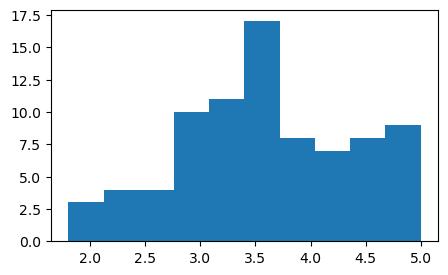

In [240]:
#distribucion de las notas primer 50 con ing Quevedo 
plt.figure(figsize=(5,3))
plt.hist(df_asig['nota'])

Las notas menores a 2.0 son valores mas atípicos, se repiden con poca frecuencia

(array([ 3., 22., 27., 12.,  4.,  5.,  6.,  0.,  0.,  2.]),
 array([ 47.4 ,  53.66,  59.92,  66.18,  72.44,  78.7 ,  84.96,  91.22,
         97.48, 103.74, 110.  ]),
 <BarContainer object of 10 artists>)

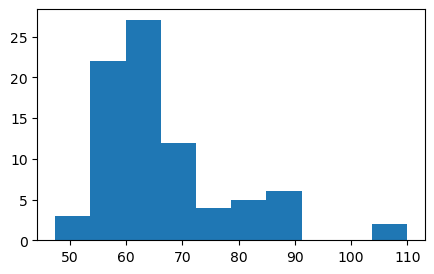

In [241]:
#distribucion del peso 
plt.figure(figsize=(5,3))
plt.hist(df_asig['peso'])

pesos mayores a 100 kg son valores muy dispersos

(array([ 4.,  5.,  9.,  9., 15., 15., 11.,  9.,  3.,  1.]),
 array([1.56 , 1.597, 1.634, 1.671, 1.708, 1.745, 1.782, 1.819, 1.856,
        1.893, 1.93 ]),
 <BarContainer object of 10 artists>)

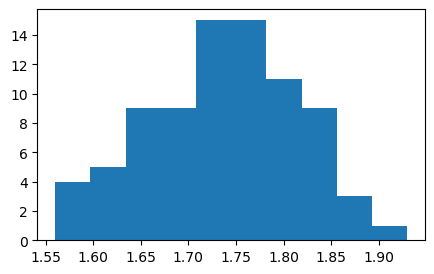

In [242]:
#distribucion de la estyatura
plt.figure(figsize=(5,3))
plt.hist(df_asig['estatura'])

En este caso, no se presentan valores atípicos tan dispersas a la distribución

(array([14., 45., 12.,  8.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([17. , 18.9, 20.8, 22.7, 24.6, 26.5, 28.4, 30.3, 32.2, 34.1, 36. ]),
 <BarContainer object of 10 artists>)

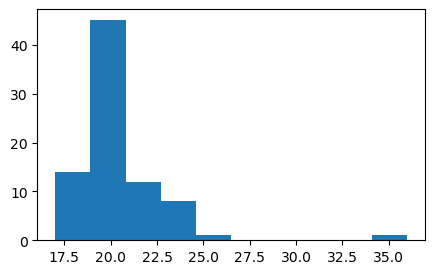

In [243]:
#distribucion de las edades
plt.figure(figsize=(5,3))
plt.hist(df_asig['edad'])

La edad de 20 es la que mas frecuencia representa, 35 años se encuentra muy disperso de la distribucion

### 2.5 boxplot

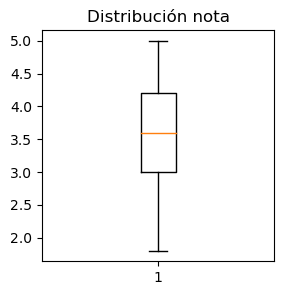

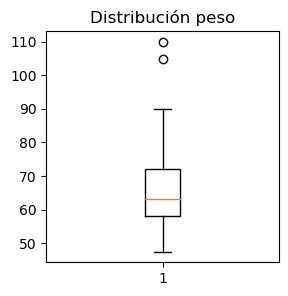

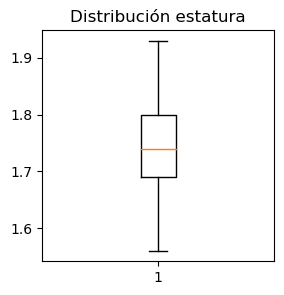

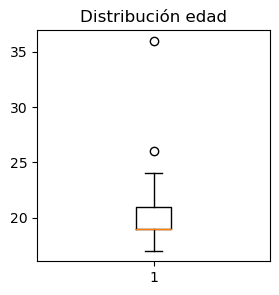

In [244]:
var_cuant=['nota','peso','estatura','edad']#variables cuantitativas

for i in var_cuant:
    plt.figure(figsize=(3,3))
    plt.title('Distribución '+i)
    plt.boxplot(df_asig[i])
    plt.show()

- en el caso de las notas, se presenta un valor atípico en 0, y las notas tiene una mayor dispersión cuando estas son menores a 35

- En el peso dos valores cercanos a 110 kg, son los mas atipicos, y los valores mayores a 60 presentan la mayor dispersión

- La estatura tiene un comportamiento de distribución normal 

- la edad  si presenta varios valores atípicos y mayor dispersión, cuando esta es mayor a 20

### 2.6 graficas de dispersion

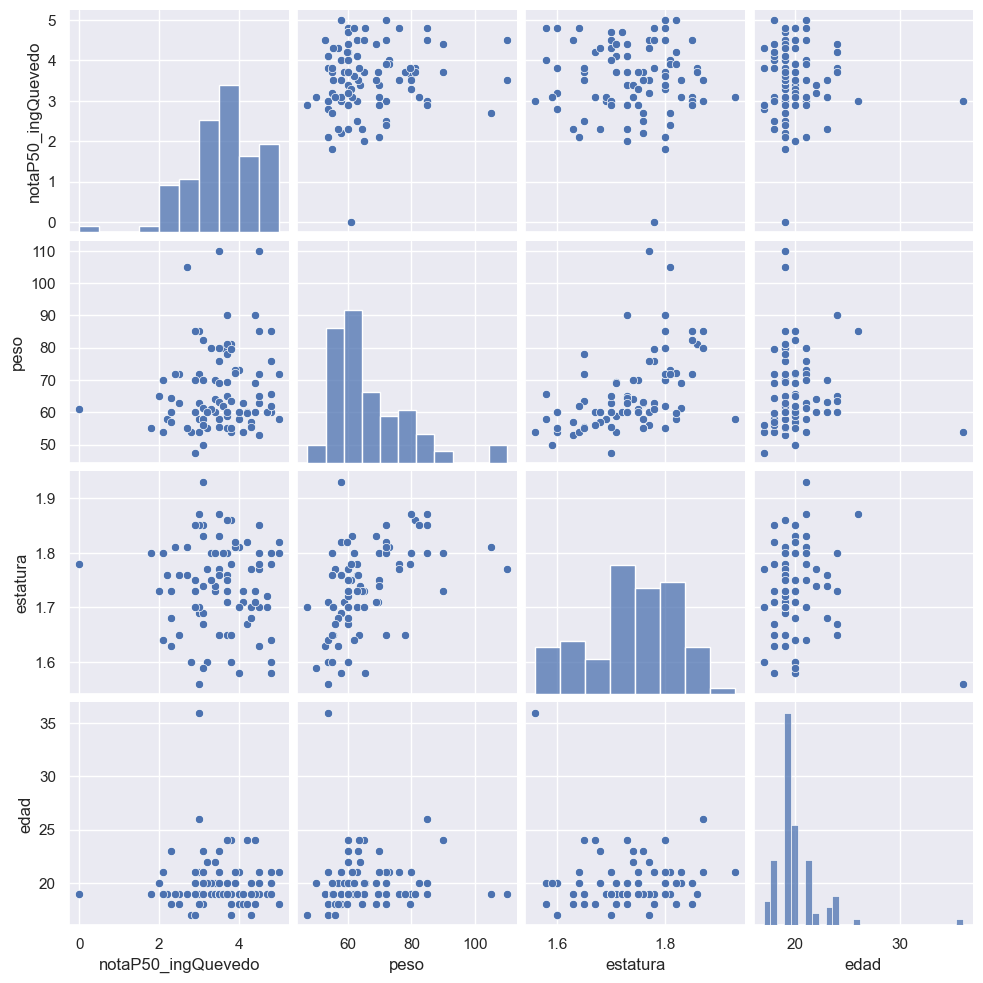

In [604]:
#dispersiones para las variables cuantitativas
sns.set()#utilizar elementos graficos de siborn
sns.pairplot(df_asig)

### matriz de correlacion

In [245]:
df_asig.corr()

,nota,peso,estatura,edad
nota,1.000000,0.060431,-0.023207,-0.058817
peso,0.060431,1.000000,0.503088,0.084498
estatura,-0.023207,0.503088,1.000000,-0.083336
edad,-0.058817,0.084498,-0.083336,1.000000


de las relaciones que se aprecian, tal vez la relacion entre peso y estatura seria la mas relevante entre las variables cuantitativas

Dicho esto, sería interesante crear una nueva columna en la que se pueda clasificar los que aprueban o no aprueban, para ver su comportamiento con las variables categóricas.

nota>=3.0--> aprueba(1)
nota<3.0-->desaprueba(0)


### preprocesamiento de datos

In [246]:
#creacion de la variable aprobación
df=df_asig
df_asig.loc[df_asig['nota']>=3.0,'aprueba']=1 # 1--> si aprueba
df_asig.loc[df_asig['nota']<3.0,'aprueba']=0 # 0--> no aprueba



se codifica las variables categoricas(asignatura_cursando,vive_con,#act_fisica_semanal,horas_sueño,actividades_extra )
para ver si tiene algún patron de relación entre ellas y con la aprobacion de la asignatura.

In [247]:
#codificacion  de asignatura_cursando
df=df_asig
df['asignatura']=df.asignatura.replace({"algoritmos y programacion I":0,
                                   "algoritmos y programacion II":1,
                                   "algoritmos y programacion III":2,
                                   "base de datos I":3,
                                   "base de datos II":4,
                                   "teoria general de sistemas":5,
                                   "ninguna":6})

In [248]:
#codificacion vive con
df['vive_con']=df.vive_con.replace({"flia primaria":0,
                                   "flia secundaria":1,
                                   "flia primaria y secudaria":2,
                                   "sol@":3})


In [249]:
#codificacion #act_fisica_semanal
df['#act_fisica_semanal']=df['#act_fisica_semanal'].replace({
                                        "Una o dos veces por semana":0,
                                        "Mas de cuatro veces por semana":1,
                                        "Tres o cuatro veces por semana":2,
                                        "No hago deporte":3})

In [250]:
#codificacion horas_sueño
df['horas_sueño']=df['horas_sueño'].replace({
                        '6 horas':0,
                        '7 horas':1,
                        '8 horas o más':2,
                        '5 horas':3,
                        '4 horas o menos':4})

In [251]:
df['actividades_extra']=df['actividades_extra'].replace({
                        'no tengo tiempo':0,
                        '2 horas a la semana':1,
                        '5 o  más horas a la semana':2,
                        'entre 2 y 5 horas a la semana':3,
                        '1  hora a la semana':4})

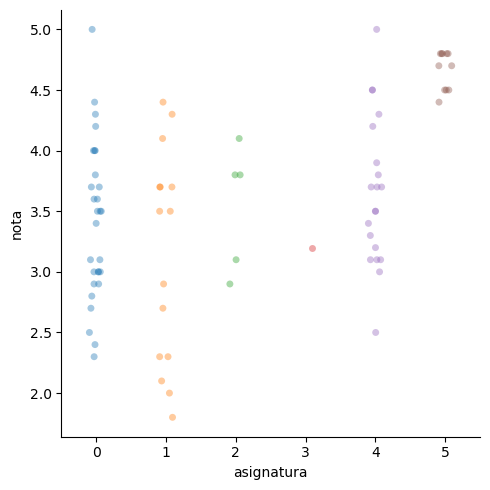

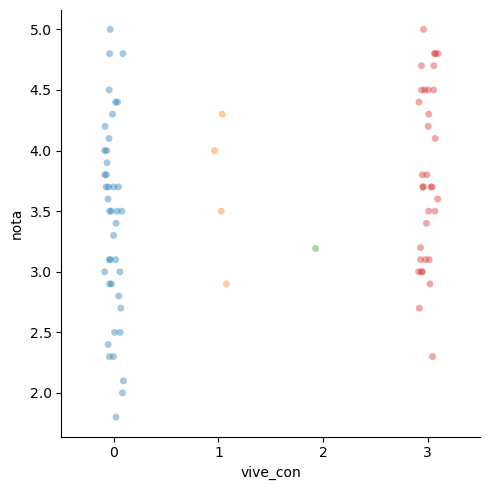

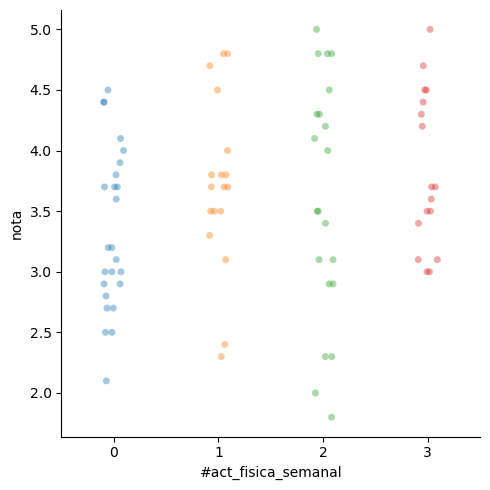

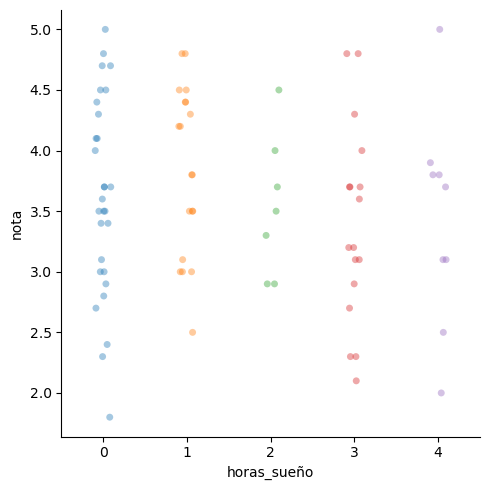

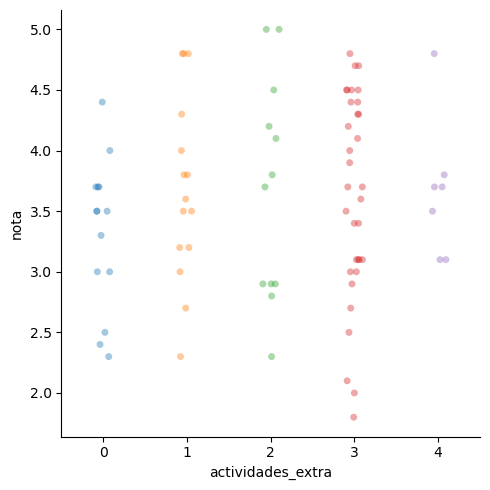

In [252]:
#correlacion variables categóricas y la nota
sns.catplot(data=df, x='asignatura',y='nota',alpha=0.4)
sns.catplot(data=df, x='vive_con',y='nota',alpha=0.4)
sns.catplot(data=df, x='#act_fisica_semanal',y='nota',alpha=0.4)
sns.catplot(data=df, x='horas_sueño',y='nota',alpha=0.4)
sns.catplot(data=df, x='actividades_extra',y='nota',alpha=0.4)

de las variables categoricas se pueden identificar varios patrones
- las asignaturas, algoritmos I y II tienen una menor probabilidad de ser aprobado a comparacion de las otras
- las personas que viven con la familia primaria tienen mas indice de no aprobar con respecto a los otros
- las personas que no hacen deporte tienen mayor mayor probabilidad de aprobar
- las personas que duermen 7,8 o mas horas son quienes mas aprueban
- quienes dedican 1 hora a la semana de actividad extra son quienes mas apruebn

Se puede agrupar las variables categoricas con las notas para ver sus probabilidades

In [255]:
#probabilidad de cursar segun la asignatura que cursa
df.groupby(["aprueba","asignatura"])["asignatura"].count()/df_.groupby('asignatura')['asignatura'].count()

aprueba  asignatura
0.0      0             0.241379
         1             0.466667
         2             0.200000
         4             0.050000
1.0      0             0.758621
         1             0.533333
         2             0.800000
         3             1.000000
         4             0.950000
         5             1.000000
Name: asignatura, dtype: float64

In [659]:
#probabilidad de aprobar segun con quien vive
df.groupby(["aprueba","vive_con"])["vive_con"].count()/df.groupby('vive_con')['vive_con'].count()

aprueba  vive_con                 
0.0      flia primaria                0.300000
         flia secundaria              0.250000
         sol@                         0.083333
1.0      flia primaria                0.700000
         flia primaria y secudaria    1.000000
         flia secundaria              0.750000
         sol@                         0.916667
Name: vive_con, dtype: float64

In [662]:
#probabilidad de aprobar segun #actividad fisica semanal
df.groupby(['aprueba','#act_fisica_semanal'])['#act_fisica_semanal'].count()/df.groupby('#act_fisica_semanal')['#act_fisica_semanal'].count()

aprueba  #act_fisica_semanal           
0.0      Mas de cuatro veces por semana    0.142857
         No hago deporte                   0.052632
         Tres o cuatro veces por semana    0.318182
         Una o dos veces por semana        0.275862
1.0      Mas de cuatro veces por semana    0.857143
         No hago deporte                   0.947368
         Tres o cuatro veces por semana    0.681818
         Una o dos veces por semana        0.724138
Name: #act_fisica_semanal, dtype: float64

In [663]:
#probabilidad de aprobación segun las horas de sueño
df.groupby(['aprueba','horas_sueño'])['horas_sueño'].count()/df.groupby('horas_sueño')['horas_sueño'].count()

aprueba  horas_sueño    
0.0      4 horas o menos    0.222222
         5 horas            0.294118
         6 horas            0.222222
         7 horas            0.095238
         8 horas o más      0.250000
1.0      4 horas o menos    0.777778
         5 horas            0.705882
         6 horas            0.777778
         7 horas            0.904762
         8 horas o más      0.750000
Name: horas_sueño, dtype: float64

In [664]:
#aprobacion segun actividades extra
df.groupby(['aprueba','actividades_extra'])['actividades_extra'].count()/df.groupby('actividades_extra')['actividades_extra'].count()

aprueba  actividades_extra            
0.0      2 horas a la semana              0.166667
         5 o  más horas a la semana       0.357143
         entre 2 y 5 horas a la semana    0.228571
         no tengo tiempo                  0.187500
1.0      1  hora a la semana              1.000000
         2 horas a la semana              0.833333
         5 o  más horas a la semana       0.642857
         entre 2 y 5 horas a la semana    0.771429
         no tengo tiempo                  0.812500
Name: actividades_extra, dtype: float64

segun los resultados numericos obtenidos concuerdan con las graficas visualizadas anteriormente

In [ ]:
#Se puede generar algunas distribuciones clasificando por el programa, electronica, sistemas

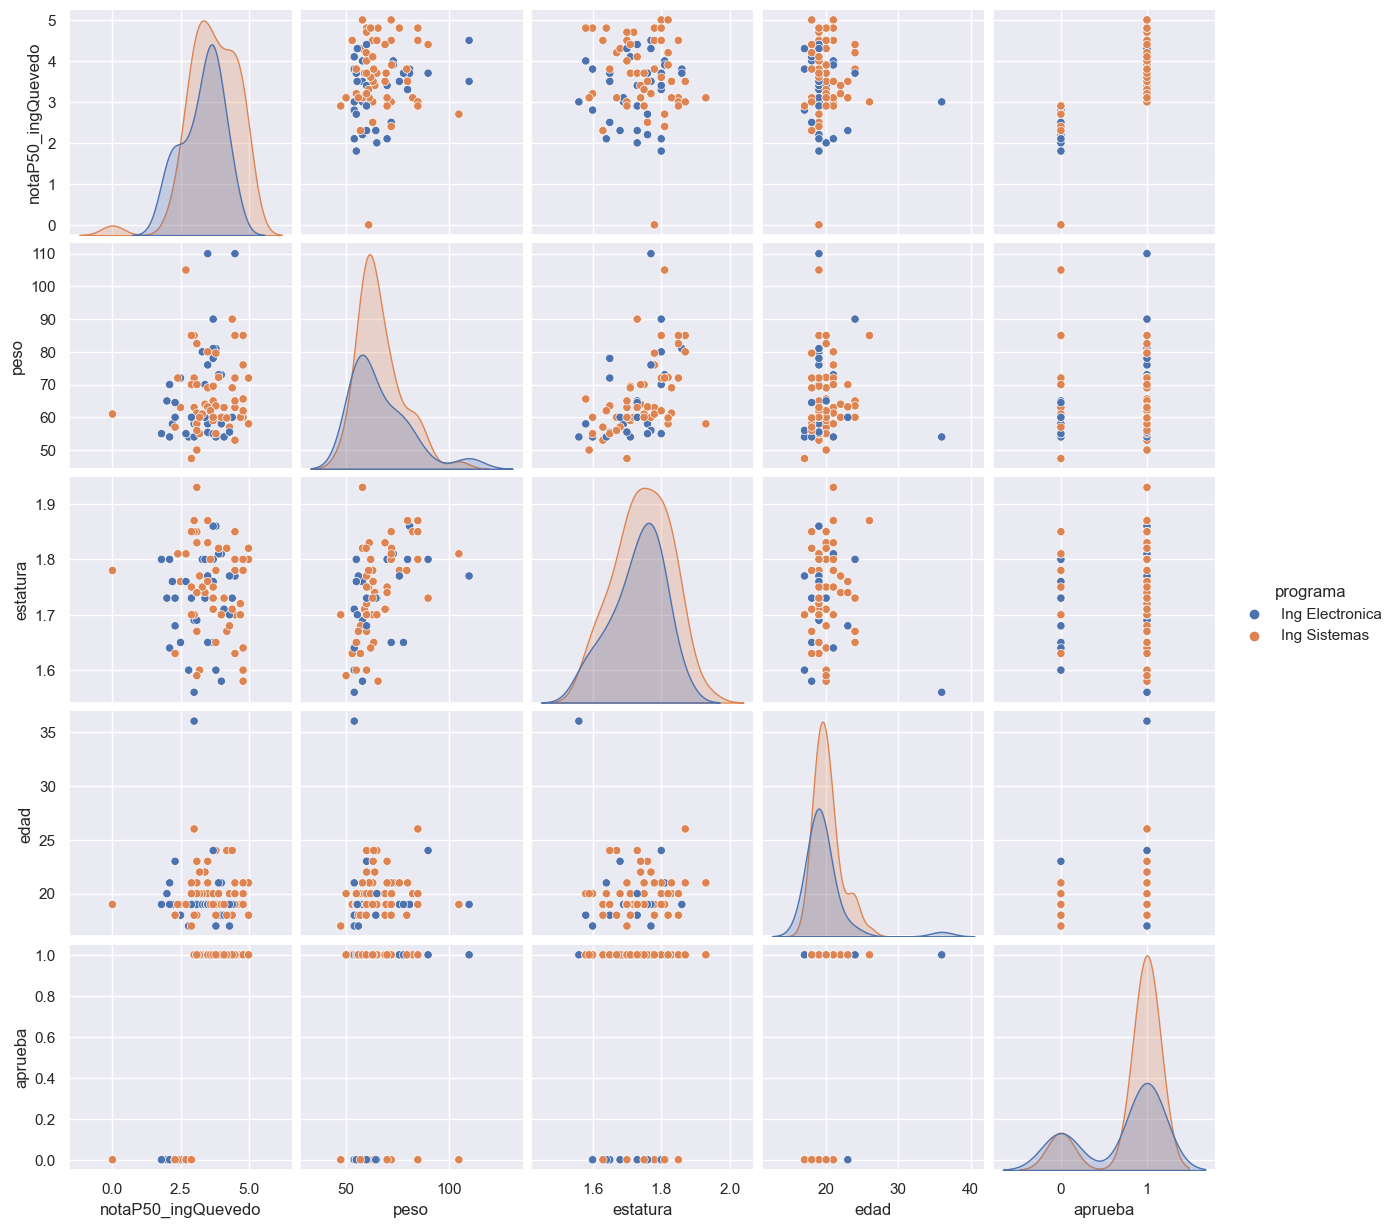

In [665]:
sns.set()
sns.pairplot(df,hue='programa')

de aqui se puede evidenciar que quienes mayor peso, estatura, edad y posibilidades de aprobar se presenta con mas frecuencia para los estudianres de ingeniería de sistemas

## 4 podria aplicarse tecticas de aprendizaje?

de todo el analisis realizado se puede concluir que es posible realizar algoritmos de aprendizaje tanto supervisado como no supervisado, en el cual podriamos clasificar si un estudiante podria o no aprobar, tomando variables relevantes como el programa,asignatura, horas de sueño, actividades extra y la actividad fisica semanal.

Como se trata de variables categóricas es necesario realizar la codificación a cada una de estas variables para posteriormete aplicar el modelo de clasificacion 